Нормализация 

In [200]:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('taxi_train.csv', header=0, sep=',', quotechar='"')


In [201]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [202]:
df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [203]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

fig = make_subplots(
    rows=2, 
    cols=2, 
    subplot_titles=['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration']
)

fig.append_trace(go.Histogram(x=df[::500]['vendor_id'], nbinsx=10),1,1)
fig.append_trace(go.Histogram(x=df[::500]['passenger_count'], nbinsx=10),1,2)
fig.append_trace(go.Histogram(x=df[::500]['store_and_fwd_flag'], nbinsx=10),2,1)
fig.append_trace(go.Histogram(x=df[::500]['trip_duration'], nbinsx=20),2,2)

fig.show()

In [204]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, 
    cols=2, 
    subplot_titles=['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration']
)

fig.append_trace(go.Box(y=df[::500]['vendor_id']),1,1)
fig.append_trace(go.Box(y=df[::500]['passenger_count']),1,2)
fig.append_trace(go.Box(y=df[::500]['store_and_fwd_flag']),2,1)
fig.append_trace(go.Box(y=df[::500]['trip_duration']),2,2)

fig.show()

In [205]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df = df.sort_values(by='pickup_datetime')


In [206]:
import plotly.express as px

fig = px.scatter_matrix(
    df[::1000], 
    dimensions=['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration'], 
    color="trip_duration"
)

fig.show()

In [207]:
df=df.drop('dropoff_datetime', axis=1)

In [208]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849
223872,id1665586,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294
713067,id1210365,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736
...,...,...,...,...,...,...,...,...,...,...
853710,id1255468,2,2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,N,472
419031,id2013516,1,2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,N,754
1008720,id0376262,1,2016-06-30 23:59:10,2,-73.873093,40.774097,-73.926704,40.856739,N,2546
405743,id2332349,2,2016-06-30 23:59:37,5,-73.998291,40.722618,-73.971779,40.762470,N,1442


In [209]:
df_train=df[:700_000]
df_test=df[700_000:1_000_000]

In [210]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1153632,id2797832,1,2016-03-28 23:52:21,1,-73.988770,40.748470,-73.983932,40.725513,N,559
586917,id2030441,1,2016-03-28 23:52:30,1,-73.974541,40.736446,-73.988731,40.765022,N,1006
664620,id2271914,2,2016-03-28 23:53:01,1,-73.991867,40.749554,-74.003479,40.727776,N,85670
1320774,id3982083,2,2016-03-28 23:53:19,1,-73.986931,40.765980,-73.981720,40.690060,N,1133
941987,id0821375,1,2016-03-28 23:53:26,1,-73.963882,40.807800,-73.955032,40.819920,N,273
...,...,...,...,...,...,...,...,...,...,...
1384418,id2351670,2,2016-05-04 03:10:19,1,-73.990578,40.757702,-73.920914,40.756573,N,841
1100978,id0756776,1,2016-05-04 03:11:21,1,-73.994774,40.760296,-73.984291,40.766556,N,137
630885,id1074885,1,2016-05-04 03:11:36,1,-73.986427,40.741432,-73.895416,40.758724,N,1002
567651,id1753963,2,2016-05-04 03:13:35,5,-73.994522,40.724815,-73.990700,40.723518,N,189


<AxesSubplot:>

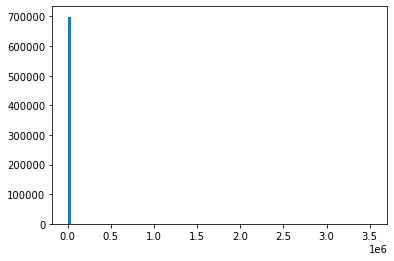

In [211]:
df_train.trip_duration.hist(bins=100, grid = False, )

заметим выбросы. Вероятно, есть очень длинные поездки и короткие. Попробуем взять log(1 + x) от длины поездки. Единицу мы прибавляем, чтобы избежать проблем с поездками, которые например мнгновенно завершились.

<AxesSubplot:>

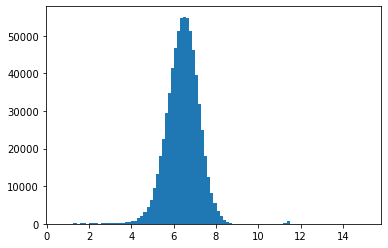

In [212]:
import numpy as np
np.log1p(df_train.trip_duration).hist(bins=100, grid = False, )

Картина выглядит лучше, далее будем использовать логарифм

In [213]:

df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)


<ipython-input-213-05311ce01512>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-213-05311ce01512>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:

df_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,6.745236
223872,id1665586,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,7.166266
713067,id1210365,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,6.013715
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,5.638355
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,6.602588


нарисовать сколько и в какие дни было поездок на такси.

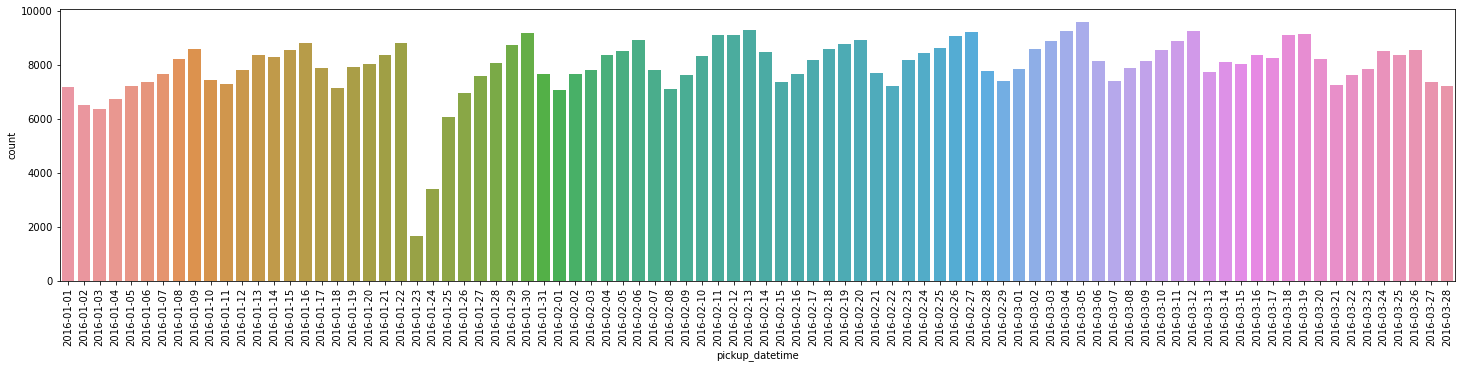

In [215]:

date_sorted = df_train.pickup_datetime.dt.date.sort_values()
plt.figure(figsize=(25,5))
date_count_plot = sns.countplot(
    x=data_sorted,
)
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=90);
    

заметим, что есть  патерны, которые повторяются каждую неделю. Так же заметим аномальные провалы.

Рассмотрим теперь распредление по часам

C:\Users\Niklad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='pickup_datetime', ylabel='count'>

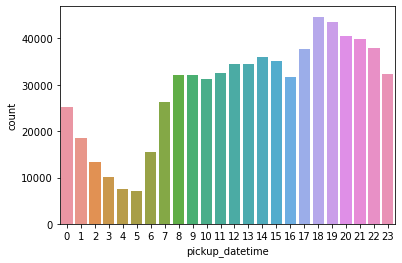

In [216]:
sns.countplot( df_train.pickup_datetime.apply(lambda x: x.hour), )

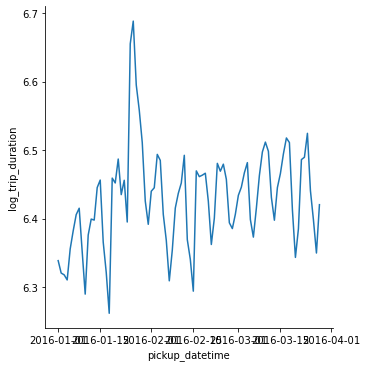

In [217]:
group_by_weekday = df_train.groupby(df_train.pickup_datetime.dt.date)
sns.relplot(data=group_by_weekday.log_trip_duration.aggregate('mean'), kind='line');


опять же заметим последовательность, сезонность.


In [276]:
import datetime 
def features(data_frame):
    X=pd.cancat([
        data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
        data_frame.pickup_datetime.apply(lambda x: x.hour),
       
    ], axis=1, keys= ['hour', 'day', ]
    )
    return X, data_frame.log_trip_duration

In [277]:

X_train, y_train = create_features(df_train)


In [278]:
X_test, y_test = create_features(df_test)

In [279]:
X_train

,day,hour
96469,1,0
223872,1,0
713067,1,0
652463,1,0
722901,1,0
...,...,...
165119,88,23
282393,88,23
1367666,88,23
811061,88,23


In [280]:
X_train.shape

(700000, 2)

In [281]:
from sklearn.model_selection import train_test_split

model=LinearRegression()

In [282]:
model.fit(X_train,y_train)

LinearRegression()

In [283]:
from sklearn.metrics import mean_squared_error

In [284]:
a = mean_squared_error(y_test, model.predict(X_test))
a

0.6320289064225536

In [285]:

model.coef_

array([0.00068679, 0.0042205 ])

веса

In [286]:
model.intercept_

6.341295630695556

смещение

можем заметить, что все плохо

In [287]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [288]:
ohe = ColumnTransformer([("One hot", OneHotEncoder(sparse=False),[1])], remainder="passthrough")

In [289]:
X_train=ohe.fit_transform(X_train)

In [290]:
X_train

array([[ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1., 88.],
       [ 0.,  0.,  0., ...,  0.,  1., 88.],
       [ 0.,  0.,  0., ...,  0.,  1., 88.]])

In [291]:
X_train.shape

(700000, 25)

In [292]:
X_test = ohe.transform(X_test)

In [293]:
X_test

array([[  0.,   0.,   0., ...,   0.,   1.,  88.],
       [  0.,   0.,   0., ...,   0.,   1.,  88.],
       [  0.,   0.,   0., ...,   0.,   1.,  88.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0., 125.]])

In [294]:
X_test.shape

(300000, 25)

In [295]:
model_with_normalize = LinearRegression().fit(X_train, y_train)

In [296]:
model_with_normalize = LinearRegression()


In [297]:
model_with_normalize = LinearRegression().fit(X_train, y_train)

In [300]:

b = mean_squared_error(y_test, model_with_normalize.predict(X_test))
b

0.6257977694921311

In [301]:

model_with_normalize.coef_


array([-1.52334039e+09, -1.52334039e+09, -1.52334039e+09, -1.52334039e+09,
       -1.52334039e+09, -1.52334039e+09, -1.52334039e+09, -1.52334039e+09,
       -1.52334039e+09, -1.52334039e+09, -1.52334039e+09, -1.52334039e+09,
       -1.52334039e+09, -1.52334039e+09, -1.52334039e+09, -1.52334039e+09,
       -1.52334039e+09, -1.52334039e+09, -1.52334039e+09, -1.52334039e+09,
       -1.52334039e+09, -1.52334039e+09, -1.52334039e+09, -1.52334039e+09,
        6.99996948e-04])

In [302]:
model_with_normalize.intercept_

1523340398.8837547

In [303]:

a - b

0.006231136930422543

In [306]:
X_val = X_test.drop(["id"], axis=1).copy()


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [307]:
%%time
from sklearn.linear_model import Ridge
m = Ridge()
m.fit(X_train, y_train)

Wall time: 740 ms


Ridge()

In [308]:
prediction = m.predict(X_test)
prediction

array([6.4613421 , 6.4613421 , 6.4613421 , ..., 6.37651504, 6.37651504,
       6.37651504])

In [310]:
np.exp(prediction)

array([639.91931672, 639.91931672, 639.91931672, ..., 587.87541032,
       587.87541032, 587.87541032])

In [314]:
submit =  pd.read_csv('Taxi.csv', header=0, sep=',', quotechar='"')

In [328]:
submit=submit[:300_000]

In [329]:
submit


,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
299995,id1107425,959
299996,id3923021,959
299997,id2192412,959
299998,id1241519,959


In [330]:
submit['trip_duration'] = np.exp(prediction)
submit.to_csv('submission.csv', index=False)

<ipython-input-330-efd8b5597015>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

